Stopped using this at the last output MPSchool.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "output/Placer_sch_test.csv"
Placer_sch_test = pd.read_csv(csv_path)
Placer_sch_test.head()

,CDSCode,School,County,Charter,Magnet,EILCode,CAASPP Reported Enrollment,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores
0,3.110000e+13,Placer County Community Schools,Placer,N,N,HS,17,13,0.00,0.00,0.00,15.38,84.62,13
1,3.170000e+13,Maidu High Independent Study,Placer,N,N,HS,31,31,22.58,38.71,61.29,22.58,16.13,31
2,3.170000e+13,Confluence Continuation High,Placer,N,N,HS,28,23,0.00,0.00,0.00,13.04,86.96,23
3,3.170000e+13,Colfax High,Placer,N,N,HS,124,122,12.30,32.79,45.08,31.15,23.77,122
4,3.170000e+13,Del Oro High,Placer,N,N,HS,421,412,21.41,31.39,52.80,23.60,23.60,411


In [3]:
# Filter the DataFrame down only to those columns to chart
sch_df = Placer_sch_test[["School","Percentage Standard Exceeded", "Percentage Standard Met", "Percentage Standard Not Met"]]

# Set the index to be "School" so they will be used as labels
#sch_df = sch_df.set_index("School")

sch_df

,School,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Not Met
0,Placer County Community Schools,0.00,0.00,84.62
1,Maidu High Independent Study,22.58,38.71,16.13
2,Confluence Continuation High,0.00,0.00,86.96
3,Colfax High,12.30,32.79,23.77
4,Del Oro High,21.41,31.39,23.60
5,Placer High,39.67,31.00,9.67
6,Independence High (Alternative),4.41,10.29,60.29
7,Woodcreek High,34.54,37.21,11.83
8,Granite Bay High,58.07,30.71,4.13
9,Adelante High (Continuation),0.00,16.22,64.86


In [4]:
mschool = sch_df.loc[(sch_df['School'] == 'Oakmont High' ) |  (sch_df['School'] == 'Granite Bay High')] 
mschool

,School,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Not Met
8,Granite Bay High,58.07,30.71,4.13
10,Oakmont High,27.25,23.18,26.82


In [5]:
Pschool = sch_df.loc[(sch_df['School'] == 'Rocklin High' ) |  (sch_df['School'] == 'Woodcreek High')]  
Pschool

,School,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Not Met
7,Woodcreek High,34.54,37.21,11.83
17,Rocklin High,33.41,34.27,12.36


In [6]:
MPSchool = mschool.merge(Pschool, on="School", how="outer",)
MPSchool

,School,Percentage Standard Exceeded_x,Percentage Standard Met_x,Percentage Standard Not Met_x,Percentage Standard Exceeded_y,Percentage Standard Met_y,Percentage Standard Not Met_y
0,Granite Bay High,58.07,30.71,4.13,NaN,NaN,NaN
1,Oakmont High,27.25,23.18,26.82,NaN,NaN,NaN
2,Woodcreek High,NaN,NaN,NaN,34.54,37.21,11.83
3,Rocklin High,NaN,NaN,NaN,33.41,34.27,12.36


In [7]:
MPSchool.to_csv("output/MPSchool.csv", index=False, header=True)

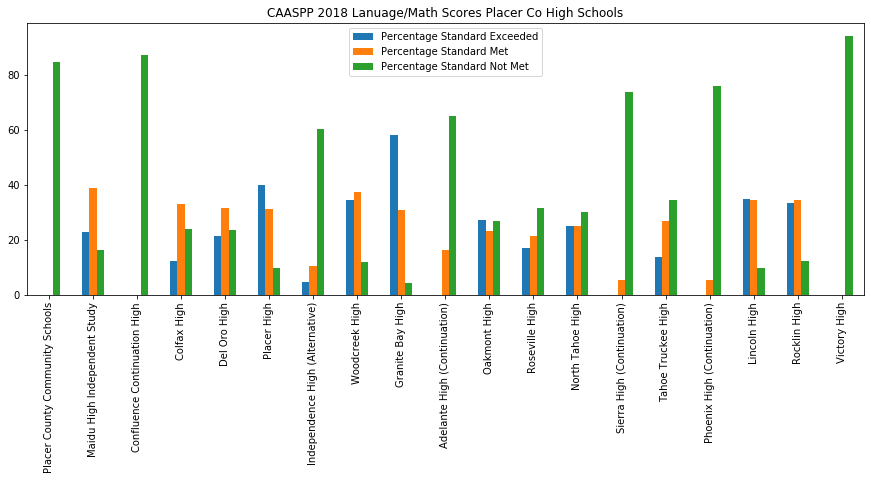

<Figure size 432x288 with 0 Axes>

In [8]:
# Use DataFrame.plot() in order to create a bar chart of the data
multi_plot = sch_df.plot(kind="bar", figsize=(15,5))
multi_plot.set_xticklabels(sch_df["School"], rotation=90)

# Set a title for the chart
plt.title("CAASPP 2018 Lanuage/Math Scores Placer Co High Schools")
plt.savefig("PlacerHS.png")
plt.show()
plt.tight_layout()

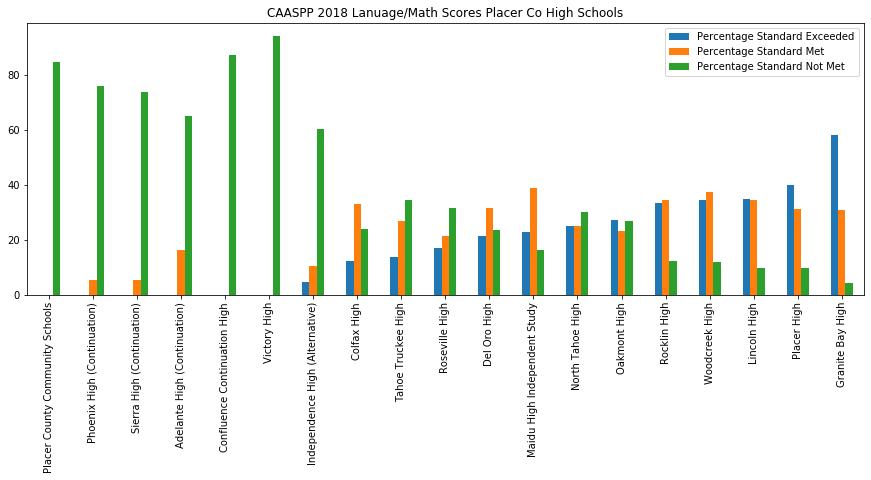

<Figure size 432x288 with 0 Axes>

In [9]:
sch_df = sch_df.sort_values(by="Percentage Standard Exceeded")
multi_plot = sch_df.plot(kind="bar", figsize=(15,5))
multi_plot.set_xticklabels(sch_df["School"], rotation=90)

# Set a title for the chart
plt.title("CAASPP 2018 Lanuage/Math Scores Placer Co High Schools")
plt.savefig("all_hs_placer.png")
plt.show()
plt.tight_layout()

In [10]:
sch_df = sch_df.loc[(sch_df["Percentage Standard Not Met"]<50)]

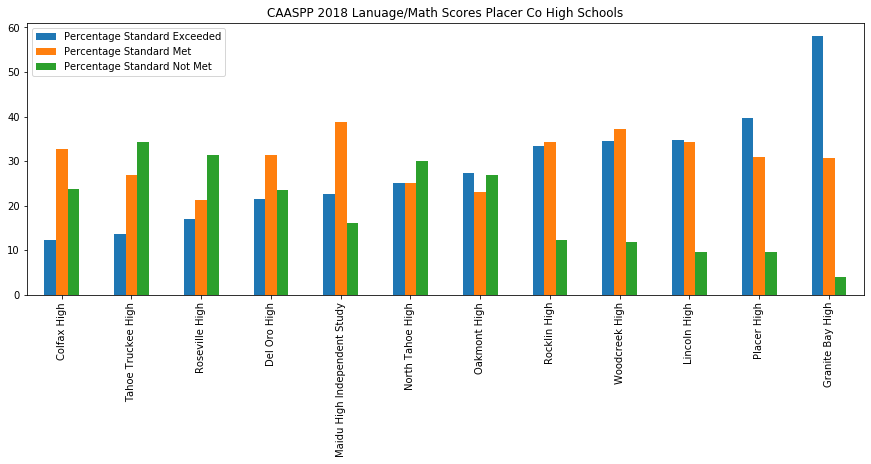

<Figure size 432x288 with 0 Axes>

In [11]:
sch_df = sch_df.sort_values(by="Percentage Standard Exceeded")
multi_plot = sch_df.plot(kind="bar", figsize=(15,5))
multi_plot.set_xticklabels(sch_df["School"], rotation=90)

# Set a title for the chart
plt.title("CAASPP 2018 Lanuage/Math Scores Placer Co High Schools")
plt.savefig("MainHS.png")
plt.show()
plt.tight_layout()

In [12]:
percent = sch_df.sum()#Percentage Standard Exceeded sum  Percentage Sfrmaetandard Met sum   Percentage Standard Not Met sum

percent_df = percent.to_frame()
percent_df.rename(columns={percent_df.columns[0]:"sum"},inplace=True)
percent_df = percent_df.iloc[1:]
percent_df

,sum
Percentage Standard Exceeded,339.82
Percentage Standard Met,366.72
Percentage Standard Not Met,233.6


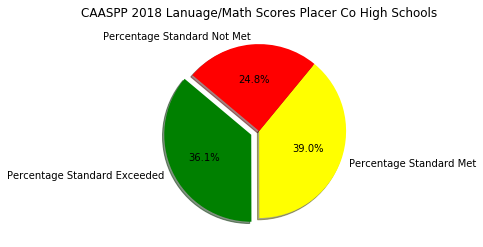

In [13]:
# worked but didnt look good  plot.pie(y="sum")


Labels = ["Percentage Standard Exceeded", "Percentage Standard Met", "Percentage Standard Not Met"]
colors = ["green", "yellow", "red"]
plt.title("CAASPP 2018 Lanuage/Math Scores Placer Co High Schools")
explode = (0.1,0,0)
plt.pie(percent_df["sum"],explode=explode, labels=Labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Percent Pie.png")
